# Numpy

# Math Operations IO Advanced 

In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
def iprint(seq, sep='--------'):
    for item in seq:
        print(item)
        print(sep)

## Basic statistics

In [4]:
x = np.array([1 , 2 , 3 , 1 ])
y = np.array([[1 , 2 , 3 ], [5 , 6 , 1 ]])

In [5]:
x.mean()

1.75

In [6]:
np.median(x)

1.5

In [7]:
np.median(y, axis = - 1 ) # last axis

array([ 2.,  5.])

In [8]:
x.std() # full population standard dev.

0.82915619758884995

In [9]:
np.corrcoef(y)

array([[ 1.        , -0.75592895],
       [-0.75592895,  1.        ]])

In [10]:
np.cov(y)

array([[ 1., -2.],
       [-2.,  7.]])

### Polynomials

In [11]:
p = np.poly1d([3 , 2 , - 1 ])
p(0)

-1

In [12]:
p.roots

array([-1.        ,  0.33333333])

In [13]:
print(p.coeffs)
print(p.order)

[ 3  2 -1]
2


In [14]:
x = np.linspace(- 1 , 1 , 2000)
y = np.cos(x) + 0.3 * np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

In [15]:
p.degree()

90

## IO

#### Byte file

In [16]:
x = np.arange(100).reshape((10,10))

In [17]:
np.save?

In [18]:
np.save('../io/x.npy', x)

In [19]:
y = np.load('../io/x.npy')

In [20]:
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [21]:
np.all(x==y)

True

#### Text file

In [22]:
x = np.arange(100).reshape((10,10))

In [23]:
np.savetxt('../io/x.txt', x)

In [24]:
y = np.loadtxt('../io/x.txt')

In [25]:
np.all(x==y)

True

In [26]:
np.savetxt('../io/array2D.csv', x, fmt='%.6f', delimiter=';')

In [27]:
np.loadtxt('../io/array2D.csv',delimiter=';')

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.],
       [ 30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.],
       [ 40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.],
       [ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.],
       [ 60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.],
       [ 70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.],
       [ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.],
       [ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.]])

## Advanced Operations

### Vectorize

np.vectorize is just a convenience function. It doesn't actually make code run any faster. If it isn't convenient to use np.vectorize, simply write your own function that works as you wish.

The purpose of np.vectorize is to transform functions which are not numpy-aware (e.g. take floats as input and return floats as output) into functions that can operate on (and return) numpy arrays.

In [28]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

In [29]:
vfunc = np.vectorize(myfunc)

In [30]:
vfunc([1, 2, 3, 4], 2)

array([3, 4, 1, 2])

In [31]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [32]:
vfunc(a, 2)

array([[2, 3],
       [4, 1],
       [2, 3]])

In [33]:
vfunc(2, [1, 2, 3, 4])

array([1, 4, 5, 6])

In [34]:
vfunc([1, 2, 3, 4], [1, 2, 3, 4])

array([2, 4, 6, 8])

### Apply along axis

In [35]:
np.apply_along_axis?

In [36]:
def my_func(a):
    """Average first and last element of a 1-D array"""
    return (a[0] + a[-1]) * 0.5

In [37]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [38]:
np.apply_along_axis(my_func, axis=0, arr=a)

array([ 4.,  5.,  6.])

In [39]:
np.apply_along_axis(my_func, axis=1, arr=a)

array([ 2.,  5.,  8.])

In [40]:
np.apply_along_axis?

### Apply over axes

In [41]:
np.apply_over_axes?

In [42]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [43]:
a.shape

(2, 3, 4)

In [44]:
np.apply_along_axis(np.sum, axis=1, arr=a)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [45]:
np.apply_over_axes(np.sum, a, [1])

array([[[12, 15, 18, 21]],

       [[48, 51, 54, 57]]])

In [46]:
b = np.apply_over_axes(np.sum, a, [1,2])
b

array([[[ 66]],

       [[210]]])

In [47]:
b.shape

(2, 1, 1)

In [48]:
np.sum(a, axis=(1,2), keepdims=True)

array([[[ 66]],

       [[210]]])

In [49]:
b = np.apply_over_axes(np.sum, a, [1])
b

array([[[12, 15, 18, 21]],

       [[48, 51, 54, 57]]])

## Structured data types

In [50]:
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [51]:
a[0,...]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [52]:
a[:,:,0]

array([[ 0,  4,  8],
       [12, 16, 20]])

In [53]:
samples = np.zeros((6,), dtype= [('sensor_code', 'S4'),
                                 ('position', np.float64), 
                                 ('value', np.float64)])

In [54]:
samples[:] = [('ALFA', 1, 0.37), 
              ('BETA', 1, 0.11),
              ('TAU', 1, 0.13),
              ('ALFA', 1.5, 0.37),
              ('ALFA', 3, 0.11),
              ('TAU', 1.2, 0.13)]

In [55]:
samples

array([(b'ALFA',  1. ,  0.37), (b'BETA',  1. ,  0.11),
       (b'TAU',  1. ,  0.13), (b'ALFA',  1.5,  0.37),
       (b'ALFA',  3. ,  0.11), (b'TAU',  1.2,  0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

In [56]:
print(samples.ndim)
print(samples.shape)
print(samples.dtype.names)

1
(6,)
('sensor_code', 'position', 'value')


In [57]:
samples['sensor_code']

array([b'ALFA', b'BETA', b'TAU', b'ALFA', b'ALFA', b'TAU'],
      dtype='|S4')

In [58]:
samples['value']

array([ 0.37,  0.11,  0.13,  0.37,  0.11,  0.13])

In [59]:
samples[0]

(b'ALFA',  1.,  0.37)

## Masked arrays

In [60]:
x = np.ma.array([1 , 2 , 3 , 4 ], mask= [ 0 , 1 , 0 , 1 ])
x

masked_array(data = [1 -- 3 --],
             mask = [False  True False  True],
       fill_value = 999999)

In [61]:
np.ma.sqrt([ 1 , - 1 , 2 , - 2 ])

masked_array(data = [1.0 -- 1.4142135623730951 --],
             mask = [False  True False  True],
       fill_value = 1e+20)

### Example

#### Vibration Response Spectrum

In [62]:
def transmissibility(zeta, r): 
    t = abs((1 + 1j * 2 * zeta * r) / (1 - r ** 2 + 1j * 2 * zeta * r))
    return t

In [63]:
zeta = 0.05

In [64]:
transmissibility(zeta, 0.05)

1.002506202773349

In [65]:
trz = lambda r: transmissibility(0.05, r)

In [66]:
frequency = np.arange(1,6)
frequency

array([1, 2, 3, 4, 5])

In [67]:
level = np.random.rand(5)
level

array([ 0.18209502,  0.85444631,  0.56346221,  0.61588788,  0.90313907])

In [68]:
ratio_mesh = np.outer(frequency, 1.0 / frequency)
ratio_mesh

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ],
       [ 2.        ,  1.        ,  0.66666667,  0.5       ,  0.4       ],
       [ 3.        ,  1.5       ,  1.        ,  0.75      ,  0.6       ],
       [ 4.        ,  2.        ,  1.33333333,  1.        ,  0.8       ],
       [ 5.        ,  2.5       ,  1.66666667,  1.25      ,  1.        ]])

In [69]:
trz_vec = np.vectorize(trz)

In [70]:
acceleration_response = np.sqrt(np.dot(level, trz_vec(ratio_mesh) ** 2))
acceleration_response

array([ 4.30169861,  9.33226989,  7.82170515,  8.34064185,  9.92728074])

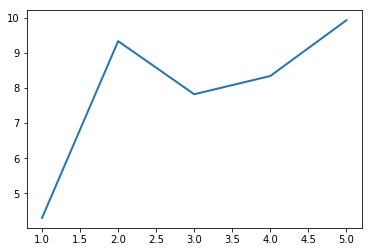

In [71]:
# OO API
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(frequency, acceleration_response, linewidth=2)

#### Simple dataset operations

In [72]:
data = np.loadtxt('../io/populations_tab.txt', dtype=np.uint32)

headers = ('year', 'hares', 'lynxes', 'carrots')
year = data[:, 0]
populations = data[:, 1:]

In [73]:
#year, hares, lynxes, carrots = data.T # trick: columns to variables

In [74]:
data

array([[ 1900, 30000,  4000, 48300],
       [ 1901, 47200,  6100, 48200],
       [ 1902, 70200,  9800, 41500],
       [ 1903, 77400, 35200, 38200],
       [ 1904, 36300, 59400, 40600],
       [ 1905, 20600, 41700, 39800],
       [ 1906, 18100, 19000, 38600],
       [ 1907, 21400, 13000, 42300],
       [ 1908, 22000,  8300, 44500],
       [ 1909, 25400,  9100, 42100],
       [ 1910, 27100,  7400, 46000],
       [ 1911, 40300,  8000, 46800],
       [ 1912, 57000, 12300, 43800],
       [ 1913, 76600, 19500, 40900],
       [ 1914, 52300, 45700, 39400],
       [ 1915, 19500, 51100, 39000],
       [ 1916, 11200, 29700, 36700],
       [ 1917,  7600, 15800, 41800],
       [ 1918, 14600,  9700, 43300],
       [ 1919, 16200, 10100, 41300],
       [ 1920, 24700,  8600, 47300]], dtype=uint32)

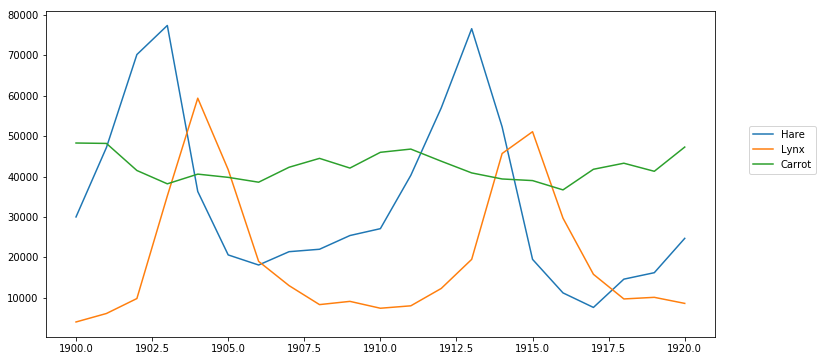

In [75]:
plt.figure(figsize=(12,6))
plt.plot(year, populations[:,0])
plt.plot(year, populations[:,1])
plt.plot(year, populations[:,2])
plt.legend(('Hare ', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [76]:
best_years = year[np.argmax(populations, axis=0)]
worst_years = year[np.argmin(populations, axis=0)]

In [77]:
print('{:12}{:>16}{:>16}{:>16}'.format('Vegs',*headers[1:]))
print('='*60)
print('{:12}{:16d}{:16d}{:16d}'.format('Max',*populations.max(axis=0)))
print('{:12}{:16d}{:16d}{:16d}'.format('Best Year',*best_years))
print('-'*60)
print('{:12}{:16d}{:16d}{:16d}'.format('Min',*populations.min(axis=0)))
print('{:12}{:16d}{:16d}{:16d}'.format('Worst Year',*worst_years))
print('-'*60)
print('{:12}{:16d}{:16d}{:16d}'.format('Total',*populations.sum(axis=0)))
print('{:12}{:16.1f}{:16.1f}{:16.1f}'.format('Mean',*populations.mean(axis=0)))
print('{:12}{:16.1f}{:16.1f}{:16.1f}'.format('St. Dev.',*populations.std(axis=0)))

Vegs                   hares          lynxes         carrots
Max                    77400           59400           48300
Best Year               1903            1904            1900
------------------------------------------------------------
Min                     7600            4000           36700
Worst Year              1917            1900            1916
------------------------------------------------------------
Total                 715700          423500          890400
Mean                 34081.0         20166.7         42400.0
St. Dev.             20897.9         16254.6          3322.5


### k-nearest neighbours

In [78]:
ref_point = np.array([5,5])
neighbors = (np.random.rand(100).reshape((50,2))*10)

In [79]:
neighbors

array([[ 2.44209481,  6.77779348],
       [ 1.05292557,  5.65981539],
       [ 5.10641918,  3.93778062],
       [ 2.85579721,  8.26087422],
       [ 4.77128372,  0.7351646 ],
       [ 2.21528334,  5.22926793],
       [ 0.26580378,  4.91584248],
       [ 4.79418874,  1.85794291],
       [ 3.96049407,  7.87652558],
       [ 5.38219602,  1.24518045],
       [ 2.05791489,  0.04683273],
       [ 7.25315378,  7.12395662],
       [ 8.48347322,  5.63274065],
       [ 6.96246662,  1.6756076 ],
       [ 1.16643333,  3.82533616],
       [ 2.60946254,  0.25263539],
       [ 8.17833666,  9.99651614],
       [ 7.55809088,  9.51274944],
       [ 4.4168353 ,  2.1490366 ],
       [ 3.68784133,  9.68620475],
       [ 4.87499402,  4.11716562],
       [ 5.05991477,  8.452839  ],
       [ 6.2799294 ,  5.24303171],
       [ 7.24251505,  2.62865152],
       [ 7.90427376,  0.40646199],
       [ 9.42004976,  8.4262493 ],
       [ 2.57492657,  5.00140457],
       [ 3.93646446,  8.36373646],
       [ 5.37692398,

In [80]:
%matplotlib notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


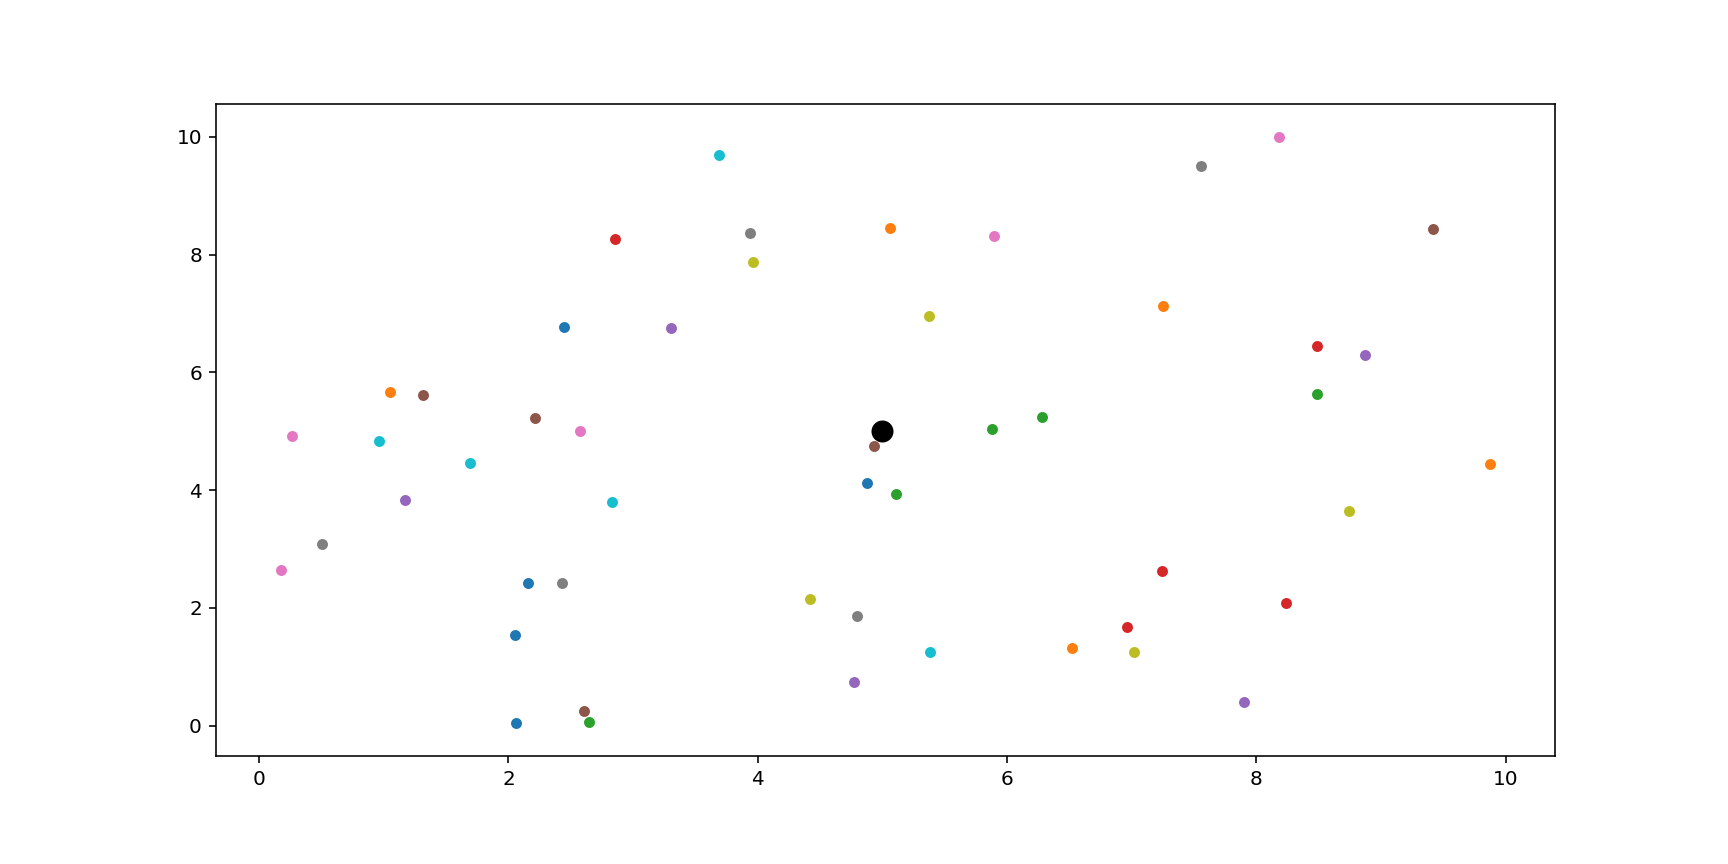

In [81]:
# OO API
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.scatter(ref_point[0], ref_point[1], c='black', s=100)

for p in neighbors:
    ax.scatter(p[0], p[1], s=20)

ax.grid(False)

In [82]:
distances = np.linalg.norm(neighbors - ref_point,axis=1)
distances

array([ 3.11503268,  4.00184369,  1.06753691,  3.90267937,  4.27096384,
        2.79413863,  4.73494417,  3.14879041,  3.05858987,  3.77422093,
        5.76105293,  3.09643241,  3.54047263,  3.86042226,  4.00949729,
        5.31527423,  5.92173939,  5.18736315,  2.90999543,  4.86644381,
        0.89164065,  3.45335879,  1.3027984 ,  3.26376582,  5.43464787,
        5.59249713,  2.42507384,  3.52786491,  1.99267227,  4.03877759,
        3.83421595,  4.90548016,  5.46018719,  3.77021732,  2.43595306,
        3.7381379 ,  3.43163642,  4.88624115,  3.98019932,  2.47861152,
        4.55085663,  3.98690152,  0.87654713,  4.35899608,  4.08179092,
        0.25824758,  5.36708727,  3.63757939,  4.25994215,  3.34965507])

In [83]:
inds = np.argsort(distances)
inds

array([45, 42, 20,  2, 22, 28, 26, 34, 39,  5, 18,  8, 11,  0,  7, 23, 49,
       36, 21, 27, 12, 47, 35, 33,  9, 30, 13,  3, 38, 41,  1, 14, 29, 44,
       48,  4, 43, 40,  6, 19, 37, 31, 17, 15, 46, 24, 32, 25, 10, 16])

In [84]:
neighbors[inds][:5]

array([[ 4.9356378 ,  4.74990138],
       [ 5.87579019,  5.03642007],
       [ 4.87499402,  4.11716562],
       [ 5.10641918,  3.93778062],
       [ 6.2799294 ,  5.24303171]])

<IPython.core.display.Javascript object>


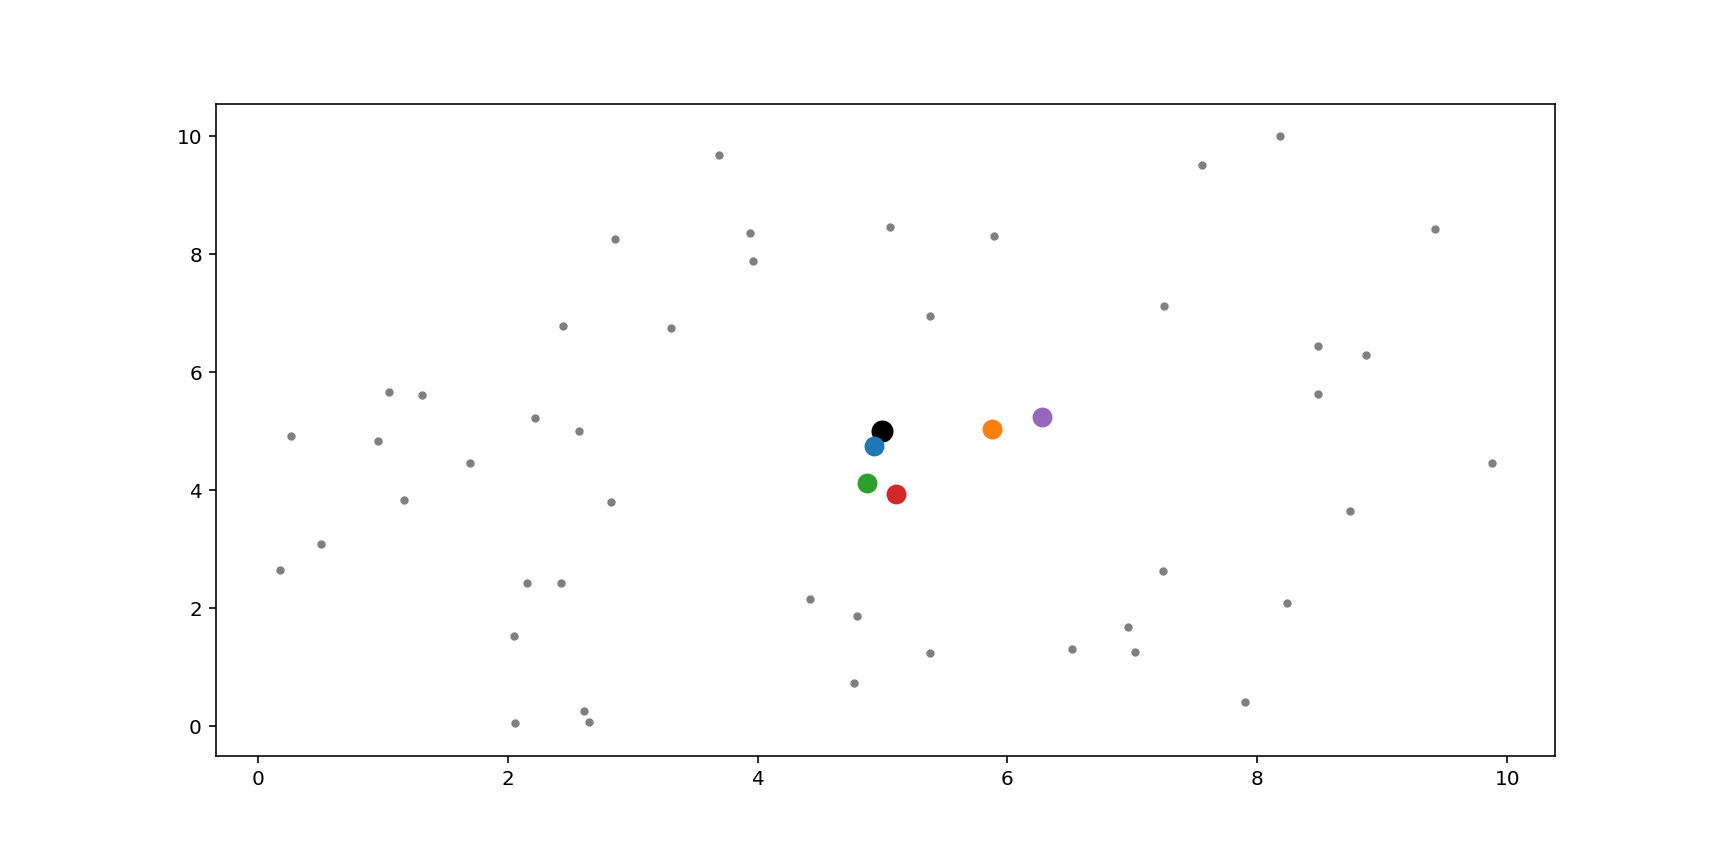

In [85]:
# OO API
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.scatter(ref_point[0], ref_point[1], c='black', s=100)

for p in neighbors[inds][:5]:
    ax.scatter(p[0], p[1], s=80)

for p in neighbors[inds][5:]:
    ax.scatter(p[0], p[1], s=10, c='gray')
    
ax.grid(False)